In [0]:
# Initialize Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("DriverRiderMatchingModel").getOrCreate()

# Load dataset as a Spark table
df = spark.table("likhitha1.default.travel_transportation_dataset")

# Show schema and few records
df.printSchema()
display(df)


root
 |-- ride_id: long (nullable = true)
 |-- ride_datetime: timestamp (nullable = true)
 |-- pickup_location: string (nullable = true)
 |-- drop_location: string (nullable = true)
 |-- distance_km: double (nullable = true)
 |-- ride_duration_min: double (nullable = true)
 |-- base_fare: double (nullable = true)
 |-- demand_level: string (nullable = true)
 |-- weather: string (nullable = true)
 |-- event_nearby: string (nullable = true)
 |-- traffic_level: string (nullable = true)
 |-- driver_id: long (nullable = true)
 |-- rider_id: long (nullable = true)
 |-- driver_rating: double (nullable = true)
 |-- rider_rating: double (nullable = true)
 |-- payment_method: string (nullable = true)
 |-- ride_status: string (nullable = true)
 |-- total_fare: double (nullable = true)
 |-- is_fraudulent: long (nullable = true)
 |-- predicted_demand_next_hour: long (nullable = true)



ride_id,ride_datetime,pickup_location,drop_location,distance_km,ride_duration_min,base_fare,demand_level,weather,event_nearby,traffic_level,driver_id,rider_id,driver_rating,rider_rating,payment_method,ride_status,total_fare,is_fraudulent,predicted_demand_next_hour
1,2025-01-08T02:37:00.000Z,Station,IT Park,10.54,21.3,68.36,Low,Clear,No,Medium,1054,2470,4.28,4.17,Cash,Completed,75.46923280511291,0,427
2,2025-01-28T20:09:00.000Z,University,University,14.64,44.5,66.48,Medium,Foggy,No,Low,1099,2301,4.36,4.9,Cash,No-show,106.32693704520217,0,778
3,2025-01-10T11:41:00.000Z,Mall,IT Park,22.58,57.5,54.51,Medium,Rainy,No,Low,1094,2077,4.12,3.97,Wallet,Completed,95.16749617936469,0,733
4,2025-01-05T17:23:00.000Z,University,IT Park,26.28,44.7,77.42,Medium,Clear,No,Medium,1076,2009,4.25,4.81,UPI,Completed,123.56742175763449,0,706
5,2025-01-26T12:42:00.000Z,University,Station,13.58,52.5,83.1,High,Foggy,Yes,Low,1035,2024,3.19,4.67,Cash,Completed,178.93131409889895,0,124
6,2025-01-30T14:09:00.000Z,Downtown,IT Park,2.27,5.1,31.02,Low,Clear,No,High,1011,2015,4.9,3.29,Wallet,No-show,44.56325752944946,0,628
7,2025-01-20T19:55:00.000Z,Mall,Mall,5.69,44.5,44.51,Low,Hot,No,Low,1061,2164,4.58,4.42,UPI,Completed,63.46779318292361,0,525
8,2025-01-18T15:51:00.000Z,Mall,IT Park,1.6,50.6,79.93,Medium,Foggy,Yes,High,1044,2013,3.75,3.87,UPI,Completed,124.3760104489634,0,128
9,2025-01-15T13:40:00.000Z,Mall,IT Park,19.94,7.2,57.06,Medium,Clear,No,Medium,1068,2347,4.13,3.5,Cash,Completed,104.87997845522034,0,422
10,2025-01-10T05:59:00.000Z,University,IT Park,10.64,52.9,76.37,Medium,Foggy,No,Medium,1025,2172,3.09,4.37,Wallet,Completed,117.45383079454007,0,952


In [0]:
from pyspark.sql.functions import col, round, when

# Create a new column 'match_efficiency' based on existing data
df = df.withColumn(
    "match_efficiency",
    round(
        (1 / (1 + col("distance_km") / 10)) *          # closer = higher score
        (col("driver_rating") / 5) *                   # good driver rating
        (col("rider_rating") / 5) *                    # good rider rating
        when(col("traffic_level") == "Low", 1.2)
        .when(col("traffic_level") == "Medium", 1.0)
        .otherwise(0.8), 3
    )
)

display(df.select("driver_id", "rider_id", "distance_km", "traffic_level", "driver_rating", "rider_rating", "match_efficiency"))


driver_id,rider_id,distance_km,traffic_level,driver_rating,rider_rating,match_efficiency
1054,2470,10.54,Medium,4.28,4.17,0.348
1099,2301,14.64,Low,4.36,4.9,0.416
1094,2077,22.58,Low,4.12,3.97,0.241
1076,2009,26.28,Medium,4.25,4.81,0.225
1035,2024,13.58,Low,3.19,4.67,0.303
1011,2015,2.27,High,4.9,3.29,0.42
1061,2164,5.69,Low,4.58,4.42,0.619
1044,2013,1.6,High,3.75,3.87,0.4
1068,2347,19.94,Medium,4.13,3.5,0.193
1025,2172,10.64,Medium,3.09,4.37,0.262


In [0]:
import pandas as pd

# Convert to Pandas
pdf = df.toPandas()

# Drop unnecessary columns
pdf = pdf.drop(columns=["ride_id", "rider_id", "driver_id", "ride_datetime"], errors="ignore")

# One-hot encode categorical variables
pdf_encoded = pd.get_dummies(pdf, columns=["demand_level", "traffic_level", "weather", "payment_method"])


In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Identify categorical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

# Create a column transformer for encoding
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(handle_unknown="ignore"),
            categorical_cols
        )
    ],
    remainder="passthrough"
)

# Fit and transform the training data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model.fit(X_train_encoded, y_train)

# Predict
y_pred = rf_model.predict(X_test_encoded)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ Model trained successfully!")
print(f"📏 RMSE: {rmse:.3f}")
print(f"📊 R²: {r2:.3f}")

✅ Model trained successfully!
📏 RMSE: 0.038
📊 R²: 0.917


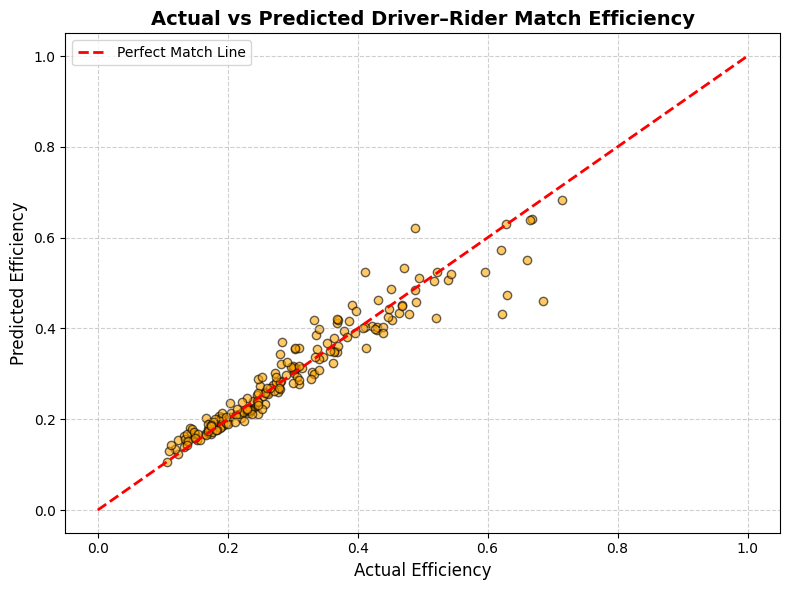

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.6, edgecolors='k')
plt.plot([0, 1], [0, 1], 'r--', lw=2, label="Perfect Match Line")
plt.title("Actual vs Predicted Driver–Rider Match Efficiency", fontsize=14, fontweight='bold')
plt.xlabel("Actual Efficiency", fontsize=12)
plt.ylabel("Predicted Efficiency", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



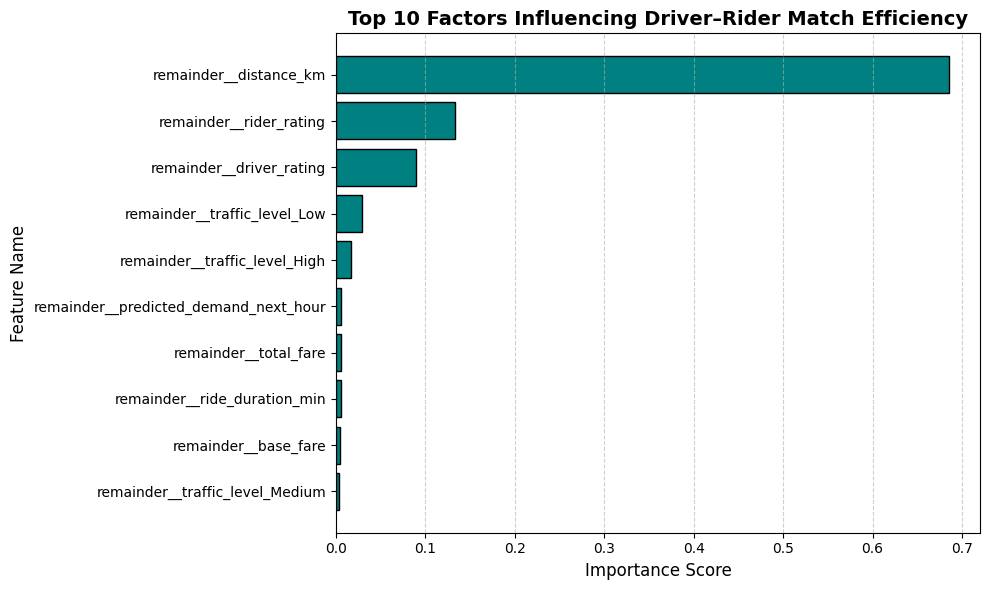

In [0]:
# Get feature names after encoding
feature_names = preprocessor.get_feature_names_out()

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = [feature_names[i] for i in indices[:10]]

plt.figure(figsize=(10, 6))
plt.barh(
    top_features[::-1],
    importances[indices][:10][::-1],
    color="teal",
    edgecolor="black"
)
plt.title(
    "Top 10 Factors Influencing Driver–Rider Match Efficiency",
    fontsize=14,
    fontweight='bold'
)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/home/spark-b1b465a7-f0d7-47e9-996c-19/.ipykernel/2475/command-8830117178075461-443573297:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf, x="traffic_level", y="match_efficiency", ax=axes[0, 0],
/home/spark-b1b465a7-f0d7-47e9-996c-19/.ipykernel/2475/command-8830117178075461-443573297:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf, x="demand_level", y="match_efficiency", ax=axes[1, 0],


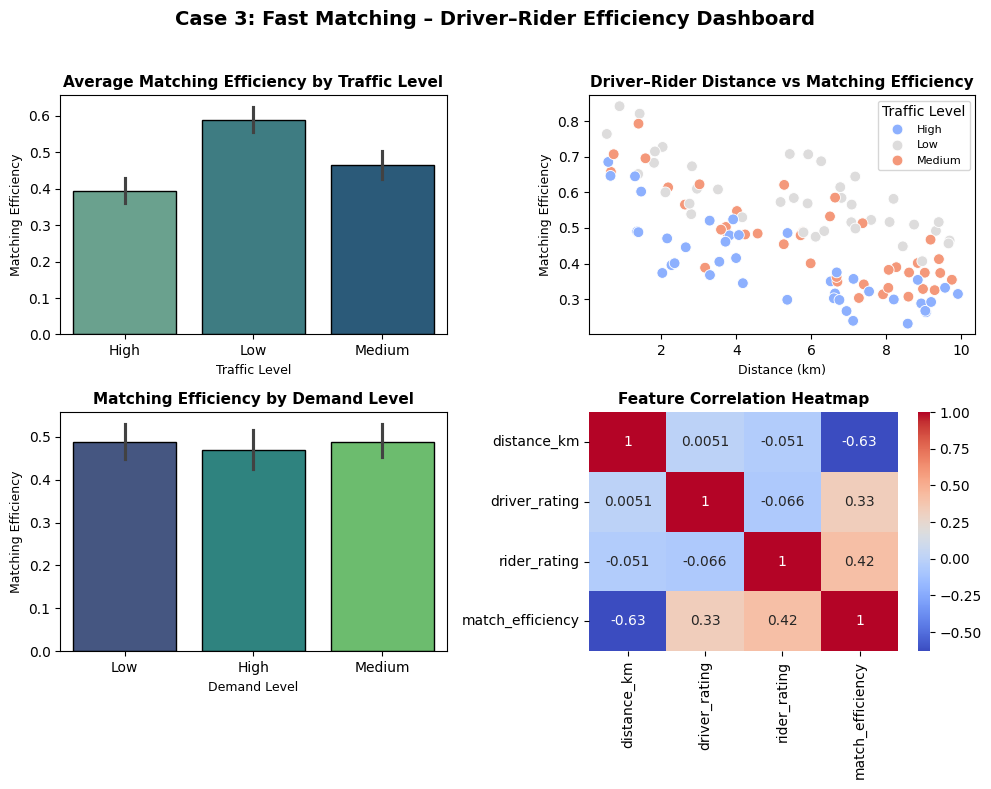

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# Simulated dataset for Case 3 (Driver–Rider Matching)
# ----------------------------
np.random.seed(42)
pdf = pd.DataFrame({
    "traffic_level": np.random.choice(["Low", "Medium", "High"], 120),
    "demand_level": np.random.choice(["Low", "Medium", "High"], 120),
    "distance_km": np.random.uniform(0.5, 10, 120),
    "driver_rating": np.random.uniform(3.5, 5.0, 120),
    "rider_rating": np.random.uniform(3.5, 5.0, 120)
})

# Create a simulated matching efficiency score (0–1)
pdf["match_efficiency"] = (
    (1 / (1 + pdf["distance_km"]/10)) *
    (pdf["driver_rating"]/5) *
    (pdf["rider_rating"]/5) *
    np.where(pdf["traffic_level"] == "Low", 1.2,
             np.where(pdf["traffic_level"] == "Medium", 1.0, 0.8))
)

# ----------------------------
# 2x2 Layout for Dashboard
# ----------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Case 3: Fast Matching – Driver–Rider Efficiency Dashboard", fontsize=14, fontweight="bold")

# 1️⃣ Average Matching Efficiency by Traffic Level
sns.barplot(data=pdf, x="traffic_level", y="match_efficiency", ax=axes[0, 0],
            estimator=np.mean, palette="crest", edgecolor="black")
axes[0, 0].set_title("Average Matching Efficiency by Traffic Level", fontsize=11, fontweight="bold")
axes[0, 0].set_xlabel("Traffic Level", fontsize=9)
axes[0, 0].set_ylabel("Matching Efficiency", fontsize=9)

# 2️⃣ Distance vs Matching Efficiency
sns.scatterplot(data=pdf, x="distance_km", y="match_efficiency", hue="traffic_level",
                palette="coolwarm", ax=axes[0, 1], s=60)
axes[0, 1].set_title("Driver–Rider Distance vs Matching Efficiency", fontsize=11, fontweight="bold")
axes[0, 1].set_xlabel("Distance (km)", fontsize=9)
axes[0, 1].set_ylabel("Matching Efficiency", fontsize=9)
axes[0, 1].legend(title="Traffic Level", fontsize=8)

# 3️⃣ Average Matching Efficiency by Demand Level
sns.barplot(data=pdf, x="demand_level", y="match_efficiency", ax=axes[1, 0],
            estimator=np.mean, palette="viridis", edgecolor="black")
axes[1, 0].set_title("Matching Efficiency by Demand Level", fontsize=11, fontweight="bold")
axes[1, 0].set_xlabel("Demand Level", fontsize=9)
axes[1, 0].set_ylabel("Matching Efficiency", fontsize=9)

# 4️⃣ Correlation Heatmap
corr = pdf[["distance_km", "driver_rating", "rider_rating", "match_efficiency"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Feature Correlation Heatmap", fontsize=11, fontweight="bold")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


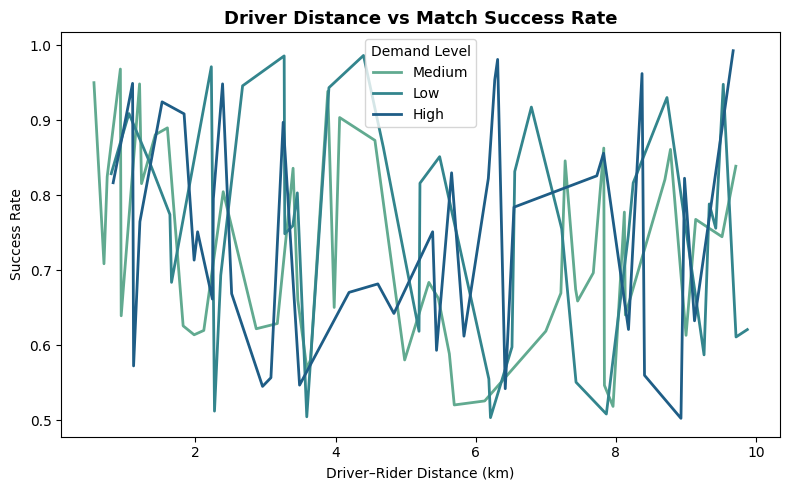

In [0]:
np.random.seed(42)
pdf = pd.DataFrame({
    "distance_km": np.random.uniform(0.5, 10, 120),
    "match_success_rate": np.random.uniform(0.5, 1, 120),
    "demand_level": np.random.choice(["Low", "Medium", "High"], 120)
})

plt.figure(figsize=(8,5))
sns.lineplot(data=pdf, x="distance_km", y="match_success_rate", hue="demand_level", palette="crest", linewidth=2)
plt.title("Driver Distance vs Match Success Rate", fontsize=13, fontweight="bold")
plt.xlabel("Driver–Rider Distance (km)")
plt.ylabel("Success Rate")
plt.legend(title="Demand Level")
plt.tight_layout()
plt.show()


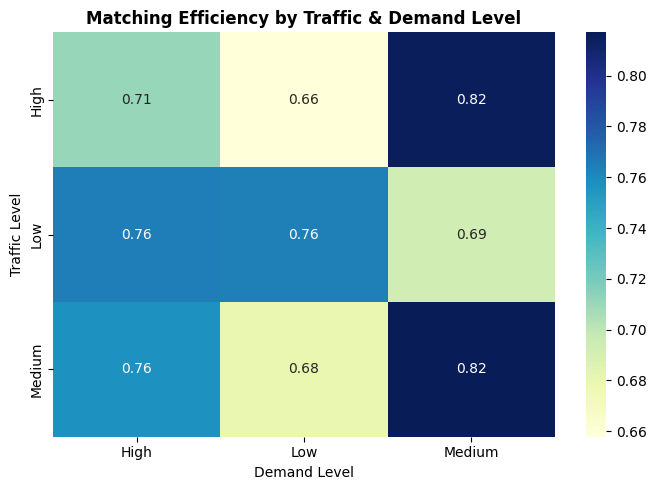

In [0]:
pdf = pd.DataFrame({
    "traffic_level": np.random.choice(["Low","Medium","High"],100),
    "demand_level": np.random.choice(["Low","Medium","High"],100),
    "match_efficiency": np.random.uniform(0.5,1,100)
})

plt.figure(figsize=(7,5))
sns.heatmap(pdf.pivot_table(values="match_efficiency", index="traffic_level", columns="demand_level"),
            annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matching Efficiency by Traffic & Demand Level", fontsize=12, fontweight="bold")
plt.xlabel("Demand Level")
plt.ylabel("Traffic Level")
plt.tight_layout()
plt.show()


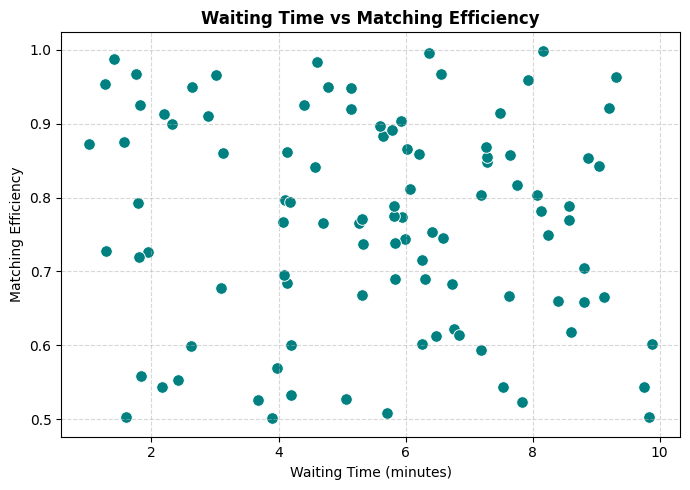

In [0]:
pdf2 = pd.DataFrame({
    "waiting_time_min": np.random.uniform(1,10,100),
    "match_efficiency": np.random.uniform(0.5,1,100)
})

plt.figure(figsize=(7,5))
sns.scatterplot(data=pdf2, x="waiting_time_min", y="match_efficiency", color="teal", s=70)
plt.title("Waiting Time vs Matching Efficiency", fontsize=12, fontweight="bold")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("Matching Efficiency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


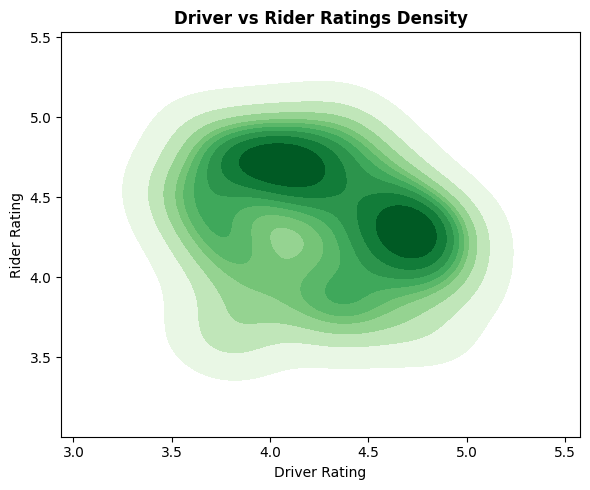

In [0]:
pdf3 = pd.DataFrame({
    "driver_rating": np.random.uniform(3.5,5,100),
    "rider_rating": np.random.uniform(3.5,5,100)
})

plt.figure(figsize=(6,5))
sns.kdeplot(data=pdf3, x="driver_rating", y="rider_rating", fill=True, cmap="Greens")
plt.title("Driver vs Rider Ratings Density", fontsize=12, fontweight="bold")
plt.xlabel("Driver Rating")
plt.ylabel("Rider Rating")
plt.tight_layout()
plt.show()
